In [6]:
from __future__ import print_function
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [2]:
batch_size = 128
num_classes = 10
epochs = 200 # experiment with this
learning_rate = 0.01 # experiment with this

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000,)
y_test shape: (10000,)


In [7]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [9]:
# the neural network model is described:
model_linear = Sequential()
model_linear.add(Flatten())
model_linear.add(Dense(num_classes, activation='softmax'))

In [11]:
# compile the model, choose the optimization objective function, learning rate

opt = SGD(learning_rate=learning_rate)

model_linear.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# train the model
history = model_linear.fit(x=x_train, y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/200
469/469 [==============================] - 1s 1ms/step - loss: 1.2892 - accuracy: 0.7027 - val_loss: 0.8075 - val_accuracy: 0.8344
Epoch 2/200
469/469 [==============================] - 1s 1ms/step - loss: 0.7138 - accuracy: 0.8408 - val_loss: 0.6043 - val_accuracy: 0.8635
Epoch 3/200
469/469 [==============================] - 1s 1ms/step - loss: 0.5854 - accuracy: 0.8600 - val_loss: 0.5237 - val_accuracy: 0.8767
Epoch 4/200
469/469 [==============================] - 1s 1ms/step - loss: 0.5239 - accuracy: 0.8694 - val_loss: 0.4785 - val_accuracy: 0.8823
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.8755 - val_loss: 0.4490 - val_accuracy: 0.8872
Epoch 6/200
469/469 [==============================] - 1s 1ms/step - loss: 0.4609 - accuracy: 0.8804 - val_loss: 0.4277 - val_accuracy: 0.8907
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.8841 - val_loss: 0.4118 - val_accuracy: 0.8930

Epoch 58/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3039 - accuracy: 0.9154 - val_loss: 0.2941 - val_accuracy: 0.9184
Epoch 59/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.9155 - val_loss: 0.2941 - val_accuracy: 0.9185
Epoch 60/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3027 - accuracy: 0.9162 - val_loss: 0.2935 - val_accuracy: 0.9191
Epoch 61/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3021 - accuracy: 0.9159 - val_loss: 0.2929 - val_accuracy: 0.9196
Epoch 62/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.9164 - val_loss: 0.2926 - val_accuracy: 0.9193
Epoch 63/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3010 - accuracy: 0.9163 - val_loss: 0.2923 - val_accuracy: 0.9196
Epoch 64/200
469/469 [==============================] - 1s 1ms/step - loss: 0.3005 - accuracy: 0.9166 - val_loss: 0.2917 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.9216 - val_loss: 0.2795 - val_accuracy: 0.9219
Epoch 116/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.9214 - val_loss: 0.2794 - val_accuracy: 0.9223
Epoch 117/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2824 - accuracy: 0.9216 - val_loss: 0.2793 - val_accuracy: 0.9225
Epoch 118/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.9217 - val_loss: 0.2794 - val_accuracy: 0.9222
Epoch 119/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9218 - val_loss: 0.2790 - val_accuracy: 0.9224
Epoch 120/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2818 - accuracy: 0.9220 - val_loss: 0.2788 - val_accuracy: 0.9222
Epoch 121/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2816 - accuracy: 0.9219 - val_loss: 0.2789 - val_ac

469/469 [==============================] - 1s 1ms/step - loss: 0.2732 - accuracy: 0.9244 - val_loss: 0.2739 - val_accuracy: 0.9228
Epoch 172/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2731 - accuracy: 0.9244 - val_loss: 0.2739 - val_accuracy: 0.9231
Epoch 173/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2730 - accuracy: 0.9246 - val_loss: 0.2737 - val_accuracy: 0.9232
Epoch 174/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2728 - accuracy: 0.9244 - val_loss: 0.2739 - val_accuracy: 0.9232
Epoch 175/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2727 - accuracy: 0.9245 - val_loss: 0.2737 - val_accuracy: 0.9229
Epoch 176/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2725 - accuracy: 0.9245 - val_loss: 0.2740 - val_accuracy: 0.9228
Epoch 177/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2725 - accuracy: 0.9246 - val_loss: 0.2736 - val_accuracy: 0.9228

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

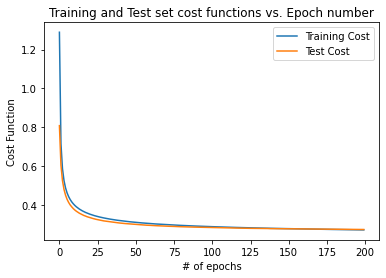

In [16]:
plt.plot(training_loss, label = "Training Cost")
plt.plot(test_loss, label = "Test Cost")
# naming the x axis 
plt.xlabel('# of epochs') 
# naming the y axis 
plt.ylabel('Cost Function') 
# giving a title to my graph 
plt.title('Training and Test set cost functions vs. Epoch number')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

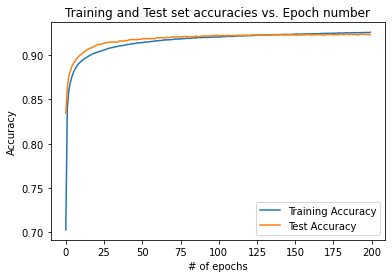

In [17]:
plt.plot(training_acc, label = "Training Accuracy")
plt.plot(test_acc, label = "Test Accuracy")
# naming the x axis 
plt.xlabel('# of epochs') 
# naming the y axis 
plt.ylabel('Accuracy')
# giving a title to my graph 
plt.title('Training and Test set accuracies vs. Epoch number')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

In [18]:
# reporting of the results
score = model_linear.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2719164192676544
Test accuracy: 0.9229999780654907


In [19]:
# find the prediction of test set
scores_test = model_linear.predict(x_test)
print('scores shape:', scores_test.shape)
# convert binary arrays to digits
scores_test = np.argmax(scores_test,axis=1)
print('scores shape:', scores_test.shape)
y_test = np.argmax(y_test,axis=1)
print('y_test shape:', y_test.shape)

scores shape: (10000, 10)
scores shape: (10000,)
y_test shape: (10000,)


In [20]:
print("Confusion matrix:\n%s" % confusion_matrix(scores_test,y_test))

Confusion matrix:
[[ 961    0    7    3    1   10   12    1    7   10]
 [   0 1109    7    0    2    2    3    7    7    7]
 [   2    2  925   22    4    3    5   23    7    2]
 [   2    2   15  919    1   30    1    9   24   11]
 [   0    0   11    0  918    9    9    6    9   35]
 [   4    2    5   26    0  776   12    1   25    7]
 [   8    4   11    2   11   17  911    0   11    0]
 [   1    2    9   11    2    6    3  945   12   28]
 [   2   14   37   18    8   32    2    2  865    8]
 [   0    0    5    9   35    7    0   34    7  901]]


In [21]:
del model_linear